# CSC8635 Machine Learning Project Report

Author: 210431461

Date: 27 January 2023

Words: 2199 (excluding in-text references, tables, section headers and bibliography)

## Introduction

<p align = "justify"> This report presents the design, investigation, and findings of machine learning pipelines for text and time series datasets. Each sample in the text dataset corresponds to a Twitter 'tweet' with a unique identification number and sentiment label. The time series dataset provides one-minute interval readings on six weather features from a Raspberry Pi computer in Newcastle between November 2021 and December 2022.

<p align = "justify"> Each dataset has a separate project objective. The text dataset(s) objective is to apply a combination of different approaches to predict the sentiment of the test set and improve the prediction results. The time series dataset objective is to try to predict future values 5, 10, 15 and 30 minutes into the future as well as 1, 2, 6 and 12 hours.

## Data Understanding


#### Text datasets

<p align = "justify"> Three 'csv' files of 'tweets' are provided; it is assumed that they are each part of a single dataset that was split into 'train', 'dev' and 'test'. The quality of the data is unclear. The 'csv' files are converted into pandas data frames for a 'Pandas Profiling Report' to support our exploratory data analysis (pandas-profiling.ydata.ai, n.d.).

<p align = "justify"> The 'train' dataset has three variables reflecting the unique identification number of the tweet ('tweet_id'), the text content of the tweet ('text'), and the sentiment label of the tweet ('airline_sentiment'). The sentiment is either negative, neutral or positive. There are 11858 observations, no missing cells, and 99.1% of the 'tweet_id' are distinct (suggesting that some duplicates may need removed). It is notable that 62.7% (7434) of the tweets are negative, 21.2% (2510) are neutral, and only 16.2% (1914) are positive, and this sentiment balance is replicated in the 'dev' and 'test' datasets. The 'dev' dataset has the same format as 'train'. There are 1318 observations, with no missing cells and 99.9% of 'tweet_id' are distinct (suggesting that there is minimal duplication). However, the 'test' dataset is in a slightly different format, including a fourth variable ('unnamed: 0'). This appears to be counting the tweets and providing a new identification number as there are 1464 observations, but only 1043 have a unique 'tweet_id'. Despite this, only 71.2% of the 'tweet_id' are distinct, suggesting there are duplicates to remove in the dataset.  

<p align = "justify"> In the 'train', 'dev', and 'test' datasets, the column 'text' appears to be raw 'tweets'. From an initial investigation, it is clear the data contains 'mentions' with special characters, 'hashtags' and numbers.

#### Time series dataset

<p align = "justify">  A single 'csv' file is provided, and the quality of its data is unclear. The 'csv' file is also converted into a pandas data frame for exploratory analysis. There are 545436 observations and eight variables in the dataset, which are described below:

| Column # | Description | Type |
|-----|------|------|
| 1 | Date and time in standard Linux format | Discrete |
| 2 | Temperature from the first internal sensor (Celsius) | Continuous |
| 3 | Outside temperature (Celsius) |  Continuous |
| 4 | CPU Temperature (Celsius) | Continuous |
| 5 | Count (always 1) | Continuous |
| 6 | Temperature from the second internal sensor (Celsius) | Continuous |
| 7 | Air Pressure (mmHg)  | Continuous |
| 8 | Humidity (percentage) | Continuous |

<p align = "justify"> There is one missing observation in column 1 ('datetime') and 99.9% of the observations are distinct, suggesting minimal duplication. The description provided of column 5 ('count') specifies that the count is always '1'; however, the pandas profile report shows that this is not the case as there is one '3'. It is assumed that this is because on this 'datetime' there were three observations; only one of these observations seems to appear in the dataset, suggesting that there has been some data cleaning already. Observations in column 7 ('humidity') appears to have a multi-modal distribution with two clear peaks, suggesting that there is an element with strong influence on this data.



## Data Preparation

####Text datasets

<p align = "justify"> Initially, duplicates are removed. The 'train' dataset now has 11767 observations and 99.9% of 'tweet_id' are distinct. Only one observation is removed from the 'dev' dataset so that 100% of 'tweet_id' are distinct. Suprisingly, the 'test' data set remains unchanged. This suggests that there may be duplicates in 'tweet_id', but that the 'tweets' (observations) are unique.

<p align = "justify"> A new column is created in each dataset called 'cleantext' to hold the new processed text. To clean the data, this text is converted into lower case, numbers are converted into text, and special characters (including punctuation and hyperlinks) are removed. Stop words are also removed as well as words with less than 2 letters. This 'cleantext' is then broken down into smaller units with the nltk 'TweetTokenizer' (Tran, 2022) and the words are reduced to base forms (both 'WordNetLemmatizer' and 'PorterStemmer' (‌Yordanov, 2019) are tried in the functions 'preprocess_1' and 'preprocess_2', respectively).

<p align = "justify"> Two different vectorizers are applied as part of the data preparation: 'CounterVectorizer' and 'TfidfVectorizer' (Kapl, 2022). These are two different approaches to creating a numerical representation of the text to make it more easily understood by the models.

####Time series dataset

<p align = "justify"> Initially, one duplicate is removed. The variable 'count' is also removed, as is the row with the missing 'datetime' value. There are now 545435 observations with seven variables in the dataset. In the 'datetime' variable, GMT and BST are removed by deleting part of the string instead of converting the data to a single time zone because of limited coding skills.

<p align = "justify"> The 'datetime' variables are also converted to a pandas datetime object. This allows us to observe that there are four dates without 1440 observations (a measure every minute in 24 hours) so these are removed. The 'datetime' objects are then converted to numeric variables to improve the performance of the models.

<p align = "justify"> The dataset is split into train and test datasets, with the test dataset consisting of at least two months of uninterrupted data (144000 observations). These datasets are separated, so that each weather feature can be processed separately. X and y values are then created for each time interval.

## Modelling

####Text datasets

<p align = "justify"> To deliver the project objective, 11 experiments are conducted using the 'train' and 'dev' datasets. In the experiments, different text normalisation approaches ('PorterStemmer' and 'WordNetLemmatizer') and vectorizers ('CountVectorizer' and 'TfidfVectorizer) are compared. A Multinormal Naive Bayes (MNB) model is applied, and two different ensembled approaches are investigated ('Stacking' and 'Voting'). Hyperparameter tuning is also explored for a Support Vector Classifier (SVC) and a 'Long Short-term Memory' (LSTM) recurrent neural network. The F1-score results of these experiments are set out below:

| Experiment | Description | F1-score |
|-----|------|------|
| 1 | WordNetLemmatizer + CounterVectorizer + SVC | 0.76 |
| 2 | PorterStemmer + CounterVectorizer + SVC | 0.76 |
| 3 | WordNetLemmatizer + TfidfVectorizer + SVC | 0.75 |
| 4 | PorterStemmer + TfidfVectorizer + SVC | 0.75 |
| 5 | GridSearchCV + SVC | 0.55 |
| 6 | SelectKBest + SVC | 0.54 |
| 7 | MNB | 0.73 |
| 8 | StackingClassifier + SVC + Logistic Regression | 0.76 |
| 9 | VotingClassifier + Random Forest + SVC | 0.74 |
| 10 | VotingClassifier + MNB + SVC | 0.71 |
| 11 | LSTM | 0.72 |

<p align = "justify"> Surprisingly, there appears to be no difference between the performance of the text normalisation approaches, and the 'CounterVectorizer' appears to perform marginally better than the 'TfidfVectorizer'. 'WordNetLemmatizer' and the better performing vectorizer are consequently used in the subsequent experiments. Experiments five and six attempt to refine the hyperparameters of the SVC. Interestingly, these struggled to improve on the default parameters. Experiments eight, nine and ten apply two different ensembled approaches. The 'StackingClassifier' does not improve on the default SVC F1-score and the 'VotingClassifier' appears to reduce the F1-score, despite applying a variety of models. Similarly, despite trying different hyperparameters, the LSTM achieved a maximum F1-score that is lower than the SVC with default parameters.

<p align = "justify"> When applied to the test dataset, the F1-score of experiment one, eight and eleven improved. These, and the confusion matrixes, are set out below:

| Experiment | Description | F1-score |
|-----|------|------|
| 1 | SVC | 0.77 |
| 8 | StackingClassifier + SVC + Logistic Regression | 0.77 |
| 11 | LSTM| 1.00 |


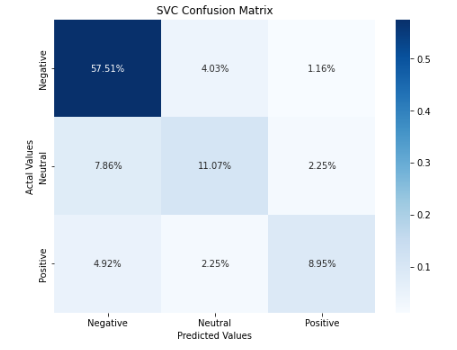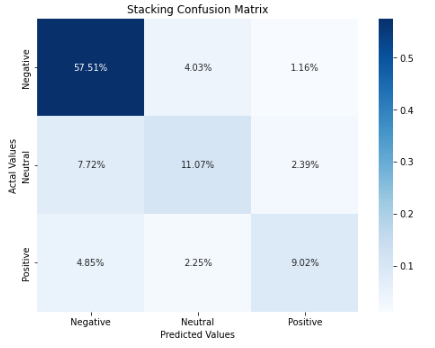

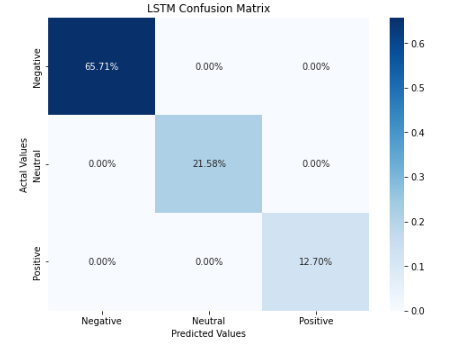

<p align = "justify"> The SVC and 'Stacking' approach appears to most accurately predict the negative 'tweets'; this is likely to be because there are more negative 'tweets' in the datasets. It would be interesting to explore balancing the datasets more to see if this improved the results. Surprisingly, the LSTM achieved an impressive F1-score of 1, and the confusion matrix reinforces this. The LSTM is now the best model to deliver the project objective for the text datasets.

####Time series dataset

<p align = "justify"> A 'Decision Tree Regressor' (DTR), 'Gradient Boosting Regressor' (GRB), an LSTM and a 'Convolutional Neural Network' (CNN) were selected as potentially effective models for forecasting time series data (Brownlee, 2018; Peixeiro, 2022; TensorFlow, 2015; Wibawa et. al, 2022). Due to the time and RAM intensive nature of this project, these models were built to work for the internal temperature datasets before being trained for  each weather features. This has limited some of the results set out below, and this will be discussed.

<p align = "justify"> It is difficult to observe the accuracy of the time interval predictions plotted beside the true values. Consequently, the Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE) are selected to help determine the effectiveness of each model per time interval. There is less error in the model's prediction when the measures are closest to zero. The prediction results of each model for each time interval per weather feature are set out in bar plots below:

###### Internal Temperature 1

<p align = "justify"> For 'Internal Temperature 1', the MSE and MAPE results are similar for all models except CNN, which appears to be producing the highest number of prediction errors all time intervals.

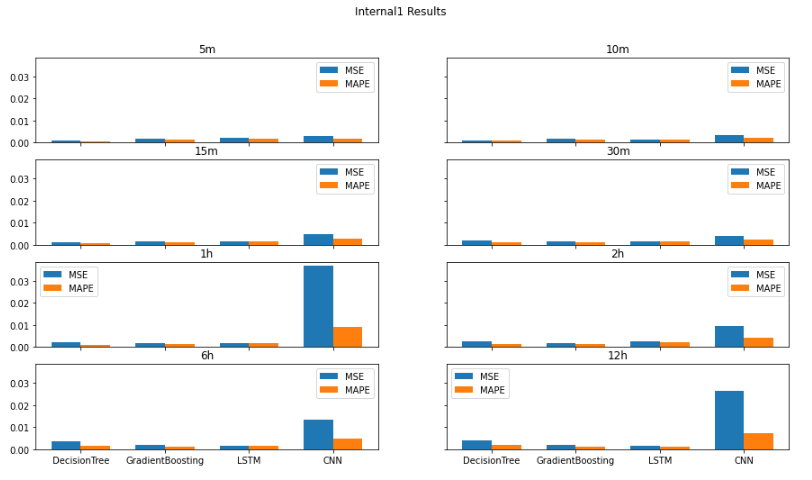

<p align = "justify"> To better observe the results, the CNN measures are removed in the plots below:


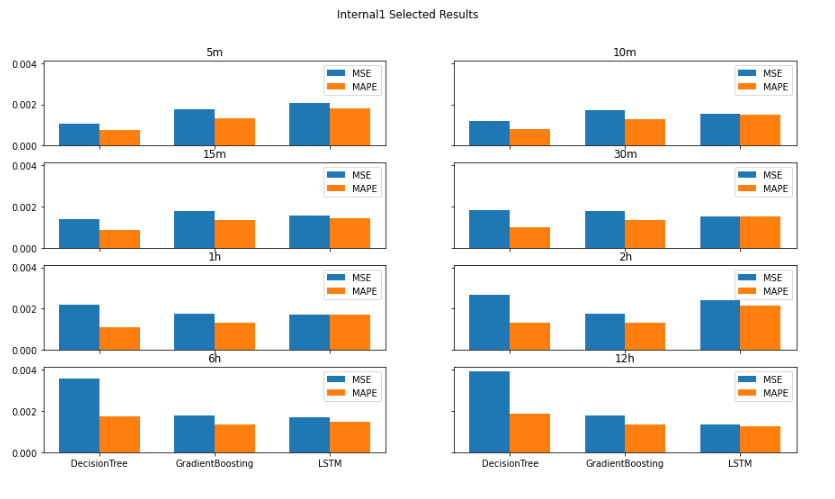

<p align = "justify"> Both measures suggest that the performance of the DTR decreases as the time interval increases. The measures vary for the GBR, with MAPE being consistently lower; despite this, GBR appears to perform consistently well for all time intervals. The measures are very similar for the LSTM and the model appears to perform well for all time intervals.

###### Internal Temperature 2

<p align = "justify"> For 'Internal Temperature 2', the results presented below appear to be consistent with those above. Overall, CNN appears to perform better, but is still has consistently larger errors.

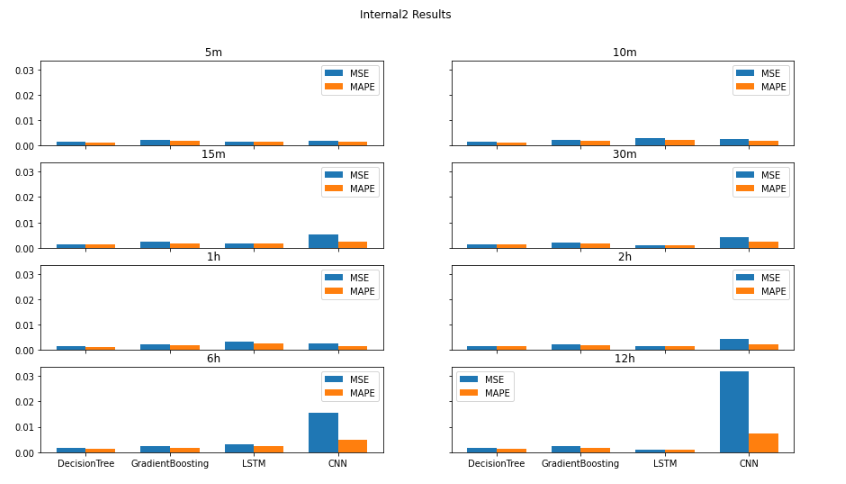

<p align = "justify"> With CNN removed from the results below, we observe that DTR appears to perform consistently well across all time intervals. The performance of GBR appears to be consistent with that of Internal Temperature 1, but with a higher rate of error. The LSTM performs inconsistently and less well for the 10 minute, 1 hour and 6 hour intervals.

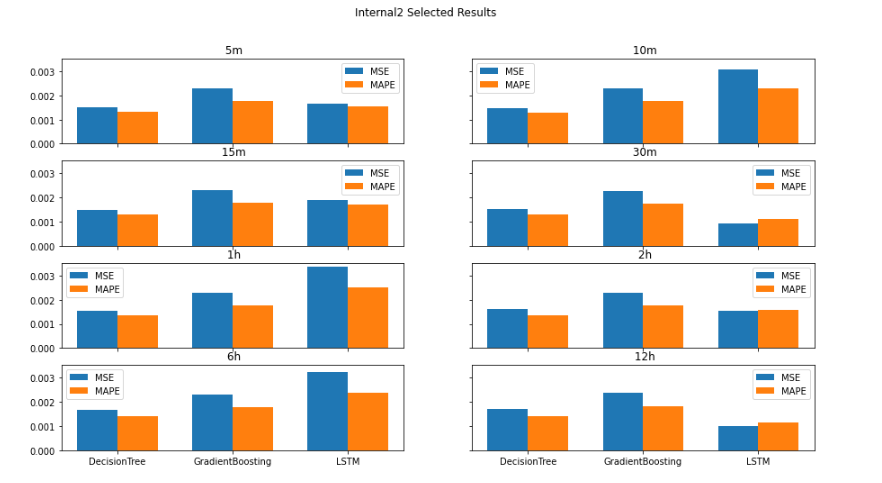

###### External Temperature

<p align = "justify"> The models are least effective on the 'External Temperature' data, and this is likely to be because they weren't specifically built for the data. The MAPE and MSE scores are on different scales and consistently higher. It would be beneficial to investigate further why the MAPE score is so high as well as scale this data as it appears more varied than both the internal datasets.

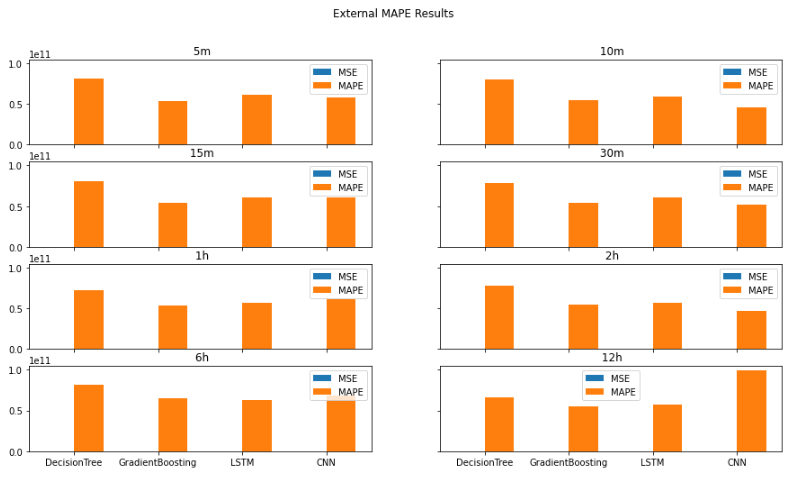

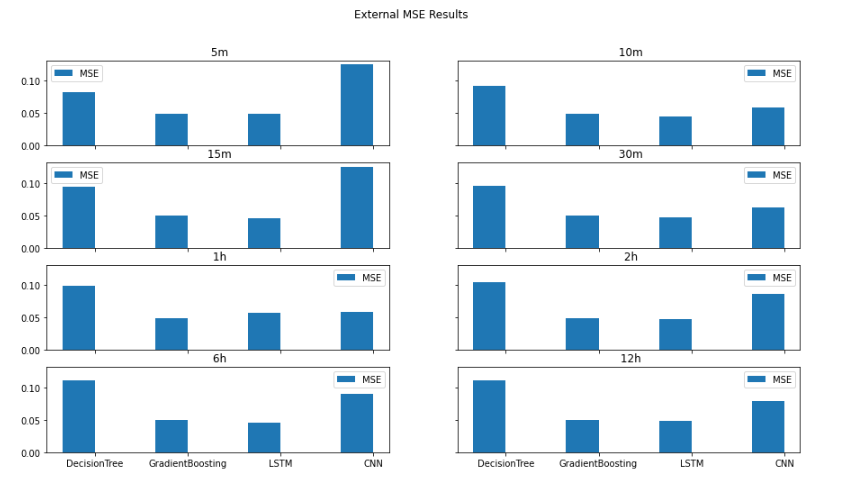

<p align = "justify"> The MSE results remain acceptably close to zero, which is an interesting contrast to the MAPE results and warrants further investigation. Across both scores, however, the GBR and LSTM perform consistently better than the DTR and CNN.

###### CPU Temperature

<p align = "justify"> The MSE and MAPE results for all time intervals of the 'CPU Temperature' are strikingly different, although both are close to zero. When comparing all four models, it was not possible to see the MAPE measures, and it was clear that the DTR and CNN had more error than the GBR and LSTM. Only the results for the latter two models are shown below so that the MAPE measures can be observed; it appears that the GBR performs more consistently, but that the LSTM may perform better except for the 5 minute and 6 hour intervals.

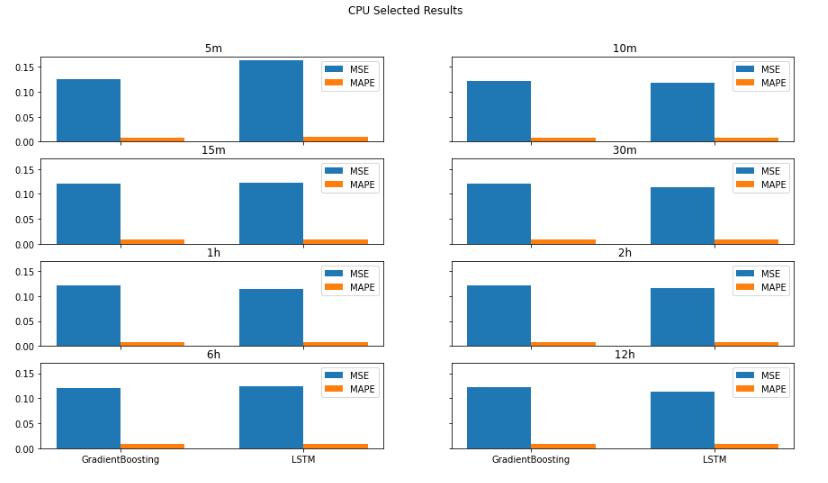

###### Air Temperature

<p align = "justify"> The MSE and MAPE are also very different for the 'Air Pressure' data. The CNN and LSTM have substantially higher MSE and MAPE measures, so they have been removed from the plots below. These plots demonstrate that the DTR performs better than the GBR.

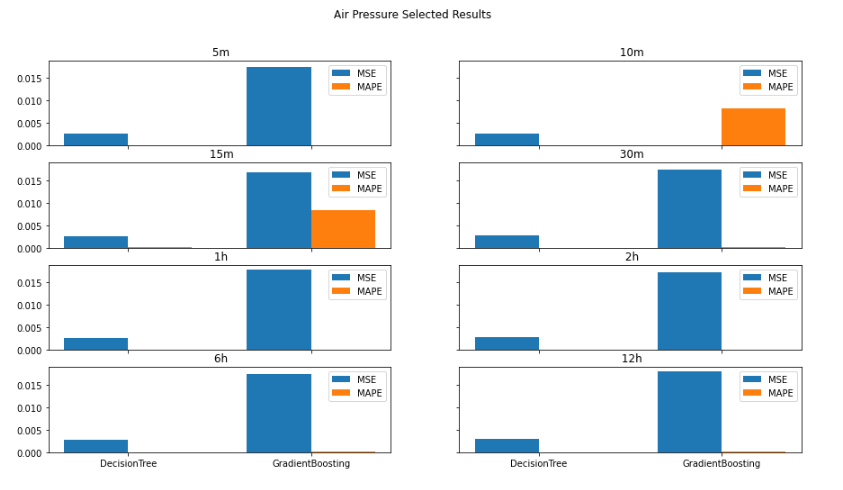

###### Humidity

<p align = "justify"> The MSE and MAPE results for the 'Humidity' data are similarly different, but much larger than those for Air Pressure. It is immediately obvious that the LSTM and CNN perform best.

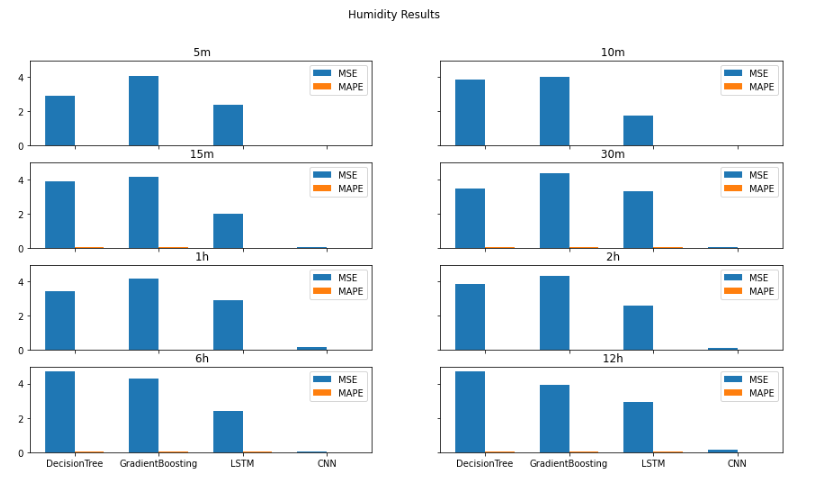

<p align = "justify"> When the DTR and GBR results are removed from the plots below, the MAPE measures and results for the CNN model are barely visible. Despite this, the CNN is clearly the best performing model for the 'humidity' data.

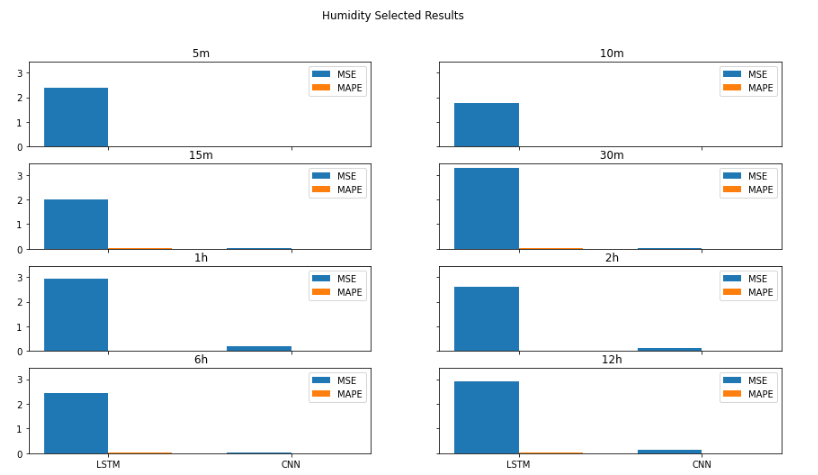

## Evaluation

####Text datasets

<p align = "justify"> The eleven experiments produced three models that successfully predict the sentiment of the test set and improve the prediction results. This is most obvious for the LSTM, where an F1-score of 1 was achieved for the test set; however, this may indicate overfitting. With more time, it would be beneficial to explore this, try using a label encoder for all models (not just the LSTM), explore Word2Vec, take a more nuanced approach to punctuation, and better explore potential ethical issues of the models.

####Time series dataset

<p align = "justify"> Future values for 5, 10, 15 and 30 minutes into the future as well as 1, 2, 6 and 12 hours were successfully predicted for all weather features. The best performing models for each feature are set out below:

| Feature | Model(s) |
|-----|------|
| Internal Temperature 1  | GBR + LSTM |
| Internal Temperature 2 | DTR |
| External Temperature | GBR + LSTM |
| CPU Temperature | GBR |
| Air Pressure | DTR |
| Humidity | CNN |

<p align = "justify"> This project was time and RAM intensive even after I managed to build the models. With more time, I would like to explore other accuracy measures, further explore the impact of seasonality on the data, better address the time zone differences, and better fine tune the hyper parameters of the best performing models for each weather feature.

### Bibliography

Beri, A. (2020). Stemming vs Lemmatization. [online] Medium. Available at: https://towardsdatascience.com/stemming-vs-lemmatization-2daddabcb22 [Accessed 27 Jan. 2023].

Brownlee, J. (2018). How to Develop LSTM Models for Time Series Forecasting. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/ [Accessed 27 Jan. 2023].

Chollet, F. (2020). The Sequential model. [online] keras.io. Available at: https://keras.io/guides/sequential_model/ [Accessed 27 Jan. 2023].


Clemente, F. (2022). How to Do an EDA for Time-Series. [online] Medium. Available at: https://towardsdatascience.com/how-to-do-an-eda-for-time-series-cbb92b3b1913#:~:text=If%20you%20were%20using%20pandas [Accessed 27 Jan. 2023].


Developer.twitter.com. (n.d.). Twitter IDs. [online] Available at: https://developer.twitter.com/en/docs/twitter-ids#:~:text=with%20your%20CMS- [Accessed 27 Jan. 2023].

Fernandez, J. (2022). Introduction to Ensemble Methods in Machine Learning. [online] Medium. Available at: https://towardsdatascience.com/introduction-to-ensemble-methods-in-machine-learning-e72c6b9ff4bc [Accessed 27 Jan. 2023].


Kapl, D. (2022). Machine Learning 101: CountVectorizer Vs TFIDFVectorizer. [online] EML. enjoymachinelearning.com. Available at: https://enjoymachinelearning.com/blog/countvectorizer-vs-tfidfvectorizer/#:~:text=CountVectorizer%20simply%20counts%20the%20number [Accessed 27 Jan. 2023].

pandas-profiling.ydata.ai. (n.d.). pandas_profiling API documentation. [online] YData Labs Inc. Available at: https://pandas-profiling.ydata.ai/docs/master/index.html.

Peixeiro, M. (2022). The Complete Guide to Time Series Forecasting Using Sklearn, Pandas, and Numpy. [online] Medium. Available at: https://towardsdatascience.com/the-complete-guide-to-time-series-forecasting-using-sklearn-pandas-and-numpy-7694c90e45c1 [Accessed 27 Jan. 2023].

Scikit-learn (n.d.). sklearn.feature_extraction.text.CountVectorizer — scikit-learn 0.23.2 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer [Accessed 27 Jan. 2023].

Scikit-learn (n.d.). 1.11. Ensemble methods — scikit-learn 0.23.2 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier [Accessed 27 Jan. 2023].


Scikit-learn (2018). sklearn.feature_extraction.text.TfidfVectorizer — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html [Accessed 27 Jan. 2023].

Scikit-learn (2018). 1.4. Support Vector Machines — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org.org. Available at: https://scikit-learn.org/stable/modules/svm.html [Accessed 27 Jan. 2023].


TensorFlow (2015). Time series forecasting  |  TensorFlow Core | Tutorials. [online] TensorFlow. Available at: https://www.tensorflow.org/tutorials/structured_data/time_series [Accessed 27 Jan. 2023].


Tran, K. (2022). How to Tokenize Tweets with Python. [online] Medium. Available at: https://towardsdatascience.com/an-introduction-to-tweettokenizer-for-processing-tweets-9879389f8fe7 [Accessed 27 Jan. 2023].

Wibawa, A.P., Utama, A.B.P., Elmunsyah, H., Pujianto, U., Dwiyanto, F.A. and Hernandez, L. (2022). Time-series analysis with smoothed Convolutional Neural Network. Journal of Big Data, 9(1). doi:10.1186/s40537-022-00599-y.


Yener, Y. (2020). Step by Step: Twitter Sentiment Analysis in Python. [online] Medium. Available at: https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d [Accessed 27 Jan. 2023].

‌Yordanov, V. (2019). Introduction to Natural Language Processing for Text. [online] Medium. Available at: https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63 [Accessed 27 Jan. 2023].

‌
‌